In [1]:
#%matplotlib inline
%matplotlib widget

## imports

In [2]:
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact

## functions

In [3]:
def l2n(x):
    return np.array(x)
def parseCircles(circles):
    x = []
    y = []
    r = []
    for i in range(len(circles)):
        x.append(circles[i,0,0])
        y.append(circles[i,0,1])
        r.append(circles[i,0,2])
        
    x,y,r = l2n(x), l2n(y),l2n(r)
    return x,y,r

In [4]:
def preProcessFrame(frame):
    #blur and grayout a frame
    
    # Convert to grayscale.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      
    # Convert to HSV and extract the saturation channel
    #sat = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)[:,:,0]

    # median filter
    #median = cv2.medianBlur(gray, 3)
    #gray_blurred = median
    # Blur using 3 * 3 kernel.
    blurSize = 10#5
    gray_blurred = cv2.blur(gray, (blurSize, blurSize))
    
    return gray_blurred

def detectCircles(frame,minRadius,maxRadius,param1=30,param2=25):
    
    minDist = minRadius-1
    dp = 0.5
    # Apply Hough transform on the blurred image.
    circles = cv2.HoughCircles(frame, 
                cv2.HOUGH_GRADIENT,dp, minDist, param1 = param1,
                param2 = param2, minRadius = minRadius, maxRadius = maxRadius)

    return circles
    
def captureFrame(video,frame_id):
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = video.read()
    if ret:
        return frame
    else:
        return ret

def drawCircles(circles,ax ):
    if circles is not None:  
    # Convert the circle parameters a, b and r to integers.
    #detected_circles = np.uint16(np.around(detected_circles))
    #fig, ax = plt.subplots() 
        for pt in circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            circle = plt.Circle((a, b), r, color='r',fill=False)
            ax.add_patch(circle)
            #ax.imshow(frame, cmap = 'gray')

def drawCirclesDf(df,ax ):
    
    
    for index, row in df.iterrows():
        x,y,r = row.x,row.y,row.r
        circle = plt.Circle((x, y), r, color='r',fill=False)
        ax.add_patch(circle)

def circlesToDataFrame(circles,frameNum):    
    x,y,r = parseCircles(circles)
    data = {'frame':[int(frameNum)]*len(circles),'x':x,'y':y,'r':r}
    dft = pd.DataFrame(data = data)
    
    return dft


def cropImage(img,x0,y0,width,height):
    return img[y0:y0+height,x0:x0+width,:]
'''def cropImage(img,x0,y0,width,height):
    d = len(img.shape)
    if d==2: #grayscale
        return img[y0:y0+height,x0:x0+width]
    elif d==3: #rgb
        return img[y0:y0+height,x0:x0+width,:]
'''


## video filenames

In [5]:
#fileName = "D:\Eden\20221208\fronters22\C0486shortLabeled.MP4"

#VERY GOOD
#fileName = 'D:\\Eden\\20221213\\fronters21\\C0492.MP4'
locateFileNameSuffix = '_locatedFull20230107a.csv'#suffix of the 
#fileNameVideo = 'D:\\Matan\\20221217\\fronters53passive28cm\\C0505.MP4'#'D:\\Eden\\29_12_22\\frontes_21_7cm\\C0538.MP4'#'D:\\Eden\\29_12_22\\aligners_21_7cm\\C0547.MP4'#'D:\\Eden\\3_1_23\\aligners_21_32cm\\C0552.MP4' #'D:\\Eden\\20221213\\fronters21\\C0492.MP4'#'D:\\Matan\\20221218\\aligners53passive28cm\\C0510.MP4'#'D:\\Eden\\20221213\\aligners21\\C0494.MP4'#'D:\\Eden\\5_1_23\\fronters8passive28cm\\C0562.MP4' #'D:\\Eden\\5_1_23\\fronters8passive28cm\\C0562.MP4'
fileNameVideo = 'D:\\Eden\\27_12_22\\fronters-12cm\\C0535.MP4'#'test.mp4'#'./C0511coppedTrimmedGray.MP4'
fileNameLocated = fileNameVideo+locateFileNameSuffix
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]



## video parameters

In [6]:
# Load video file
video = cv2.VideoCapture(fileNameVideo)
# Load locating file
df = pd.read_csv(fileNameLocated)

#get videos properties
width  = video.get(cv2.CAP_PROP_FRAME_WIDTH )
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps = video.get(cv2.CAP_PROP_FPS)      # OpenCV v2.x used "CV_CAP_PROP_FPS"
frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
pixelSize = arenaSizeCm/arenaSizePixels

## Locating params

In [7]:
x0,y0 = 310,0
width0,height0 = 1160,1080

#frameNum = 1500
threshMin = 10
threshMax = 300

radiusMin = 22
radiusMax = 24

param1 = 35#100#25#35#30#25#25
param2 = 10#35



frameRange = df.frame.unique()#range(frameMin,frameMax,frameSkip)

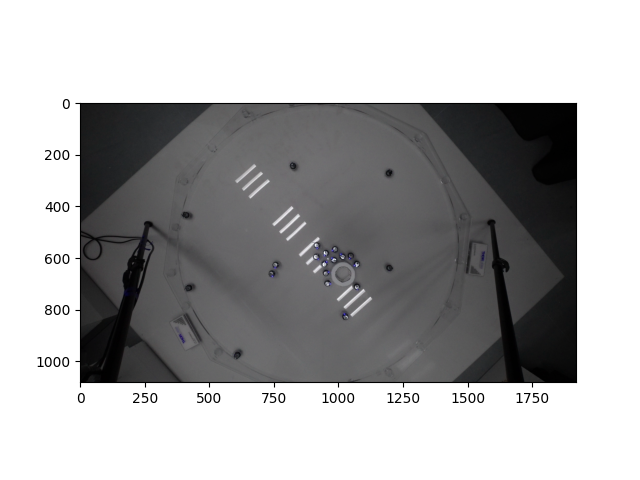

In [8]:
frameMin=0
frameNum = frameMin

frameNum = 1000

'''boxSize = int(2*(2*radiusMax))
boxSize = 300
wc,hc = boxSize,boxSize
#xc,yc = int(958-boxSize/2),int(548-boxSize/2)
xc,yc = boxSize/2,boxSize/2
'''
boxSize = int(2*(2*radiusMax))
wc,hc = boxSize,boxSize
xc,yc = int(958-boxSize/2),int(548-boxSize/2)

fig,ax= plt.subplots()
img = captureFrame(video,frameNum)
#imgRed = img[:,:,0]
#imgCropped = cropImage(imgRed,x0,y0,width0,height0)
imgCropped = img#cropImage(img,xc,yc,wc,hc)

imgE = cv2.Canny(imgCropped,threshMin,threshMax)

ax.imshow(imgCropped)
#drawCircles(circles,plt.gca())

In [9]:
plt.ioff()
fig1 = plt.figure()
ax1 = fig1.gca()
#ax.imshow(frame,cmap='Greys')
plt.ion()
#fig1.canvas

## widget cell

In [26]:
#fig,ax = plt.subplots()

starting_point=0
frame_step=1
frameRange= range(starting_point,frameCount,frame_step)
@interact(frameNum=frameRange)#df.frame.values)    
def drawPassiveParticleOnFrame(frameNum):
    #dff =df[df.frame==frameNum]
    boxSize = int(2*(2*radiusMax))
    wc,hc = boxSize,boxSize
    xc,yc = int(958-boxSize/2),int(548-boxSize/2)
    #x,y,r = dff.x.values,dff.y.values,dff.r.values
    
    #circles = [[x,y,r]]
    img = captureFrame(video,frameNum)
    imgCropped = img 
    #Edge detection:
    imgE = cv2.Canny(imgCropped,threshMin,threshMax)
    circles = detectCircles(imgE,radiusMin, radiusMax,param1,param2)
    if circles is not None:        
        xc = int(xc+circles[0][0][0]-wc/2)
        yc = int(yc+circles[0][0][1]-hc/2)
        #restore box incase it reaches the edge of the frame:
        xc = max(0,xc)
        xc = min(xc,width-wc)               
        xc = int(xc)

        yc = max(0,yc)
        yc = min(yc,height-hc)              
        yc = int(yc)
    frame  = captureFrame(video,frameNum)
    img = frame#cropImage(frame,x0,y0,width0,height0)
    ax1.cla()
    ax1.imshow(img)
    drawCircles(circles,ax1)
    
    #ax.imshow(img, cmap='Greys')
HBox([fig1.canvas])

interactive(children=(Dropdown(description='frameNum', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …